In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load csv file
df = pd.read_csv('synthetic_data.csv')

# check the first few rows
print(df.head())

  Country  Age    Salary  Purchase
0  Canada   19  807572.0     False
1   India   32  176316.0      True
2  Brazil   23  649176.0     False
3     USA   19  128246.0      True
4   India   50       NaN      True


In [3]:
# load the data into numpy arrays
X = df.iloc[:, :-1].values
y = df.iloc[:, 3].values
print(X)

[['Canada' 19 807572.0]
 ['India' 32 176316.0]
 ['Brazil' 23 649176.0]
 ['USA' 19 128246.0]
 ['India' 50 nan]
 ['Brazil' 30 780800.0]
 ['India' 46 647889.0]
 ['USA' 66 874962.0]
 ['France' 39 321369.0]
 ['India' 66 382944.0]]


In [4]:
# perform preprocessing
from sklearn.impute import SimpleImputer

# assuming x is your data with missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

print(X)


[['Canada' 19.0 807572.0]
 ['India' 32.0 176316.0]
 ['Brazil' 23.0 649176.0]
 ['USA' 19.0 128246.0]
 ['India' 50.0 529919.3333333334]
 ['Brazil' 30.0 780800.0]
 ['India' 46.0 647889.0]
 ['USA' 66.0 874962.0]
 ['France' 39.0 321369.0]
 ['India' 66.0 382944.0]]


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Extract the categorical feature (Country) from the encoding 
countries = X[:, 0].reshape(-1, 1)

# Applying OneHotEncoder
onehotencoder = OneHotEncoder()
countries = onehotencoder.fit_transform(countries).toarray()

# Combine the encoded countries with the rest of the data
X_encoded = np.concatenate((countries, X[:, 1:]), axis=1) # axis=1 means concatenate columns

print("Encoded Dataset:")
print(X_encoded)

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
print("\nEncoded Dependent Variable:")
print(y)


Encoded Dataset:
[[0.0 1.0 0.0 0.0 0.0 19.0 807572.0]
 [0.0 0.0 0.0 1.0 0.0 32.0 176316.0]
 [1.0 0.0 0.0 0.0 0.0 23.0 649176.0]
 [0.0 0.0 0.0 0.0 1.0 19.0 128246.0]
 [0.0 0.0 0.0 1.0 0.0 50.0 529919.3333333334]
 [1.0 0.0 0.0 0.0 0.0 30.0 780800.0]
 [0.0 0.0 0.0 1.0 0.0 46.0 647889.0]
 [0.0 0.0 0.0 0.0 1.0 66.0 874962.0]
 [0.0 0.0 1.0 0.0 0.0 39.0 321369.0]
 [0.0 0.0 0.0 1.0 0.0 66.0 382944.0]]

Encoded Dependent Variable:
[0 1 0 1 1 0 0 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=2) # 80% training and 20% test

print("\nTraining Set:")
print(X_train)
print(y_train)

print("\nTest Set:")
print(X_test)
print(y_test)


Training Set:
[[1.0 0.0 0.0 0.0 0.0 30.0 780800.0]
 [0.0 1.0 0.0 0.0 0.0 19.0 807572.0]
 [0.0 0.0 0.0 0.0 1.0 66.0 874962.0]
 [1.0 0.0 0.0 0.0 0.0 23.0 649176.0]
 [0.0 0.0 0.0 0.0 1.0 19.0 128246.0]
 [0.0 0.0 0.0 1.0 0.0 46.0 647889.0]
 [0.0 0.0 0.0 1.0 0.0 66.0 382944.0]
 [0.0 0.0 1.0 0.0 0.0 39.0 321369.0]]
[0 0 1 0 1 0 1 1]

Test Set:
[[0.0 0.0 0.0 1.0 0.0 50.0 529919.3333333334]
 [0.0 0.0 0.0 1.0 0.0 32.0 176316.0]]
[1 1]


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# assuming x_train and x_test are your training and test data

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print the scaled data
print("\nScaled Training Set:")
print(X_train_scaled)

print("\nScaled Test Set:")
print(X_test_scaled)


Scaled Training Set:
[[ 1.73205081 -0.37796447 -0.37796447 -0.57735027 -0.57735027 -0.46773246
   0.82835231]
 [-0.57735027  2.64575131 -0.37796447 -0.57735027 -0.57735027 -1.0730333
   0.93565162]
 [-0.57735027 -0.37796447 -0.37796447 -0.57735027  1.73205081  1.51325208
   1.20574353]
 [ 1.73205081 -0.37796447 -0.37796447 -0.57735027 -0.57735027 -0.8529239
   0.30081741]
 [-0.57735027 -0.37796447 -0.37796447 -0.57735027  1.73205081 -1.0730333
  -1.78701425]
 [-0.57735027 -0.37796447 -0.37796447  1.73205081 -0.57735027  0.41270511
   0.29565926]
 [-0.57735027 -0.37796447 -0.37796447  1.73205081 -0.57735027  1.51325208
  -0.76621194]
 [-0.57735027 -0.37796447  2.64575131 -0.57735027 -0.57735027  0.02751367
  -1.01299795]]

Scaled Test Set:
[[-0.57735027 -0.37796447 -0.37796447  1.73205081 -0.57735027  0.63281451
  -0.17715054]
 [-0.57735027 -0.37796447 -0.37796447  1.73205081 -0.57735027 -0.35767777
  -1.59435484]]


In [8]:
# Fitting the classifier to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression object
classifier = LogisticRegression(random_state=0)

# Fit the classifier to the training data
classifier.fit(X_train_scaled, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test_scaled)

# Print the test set accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 0.5



Confusion Matrix:
[[0 0]
 [1 1]]


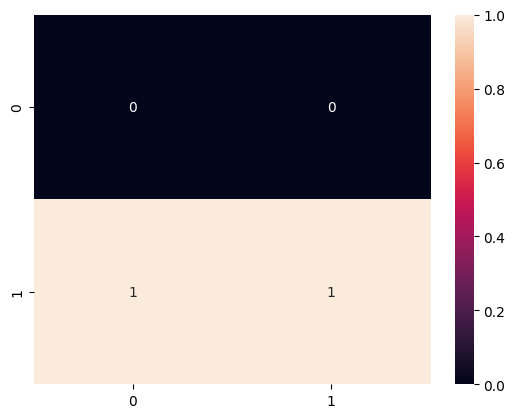

In [12]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Visualizing the confusion matrix
import seaborn as sns

# Create a heatmap
sns.heatmap(cm, annot=True)
plt.show()
